In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
%matplotlib inline

In [4]:
iris=load_iris()


#dataframe
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df['species']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
x=iris.data
y=iris.target

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

print("training set shape: ",x_train.shape)
print("testing set shape: ",x_test.shape)

training set shape:  (120, 4)
testing set shape:  (30, 4)


In [13]:
#We are telling that the decision tree to use gini impurity in order to decide wether a node is pure or not an therefore the best split possible for it
dt_model=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=42)


#training the model on the chosen/given set of data
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [15]:
#make predictions using the test score
y_pred=dt_model.predict(x_test)
print("Predicted labels:", y_pred)
print("Actual labels:",y_test)

Predicted labels: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Actual labels: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


Model Accuracy: 1.00
classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



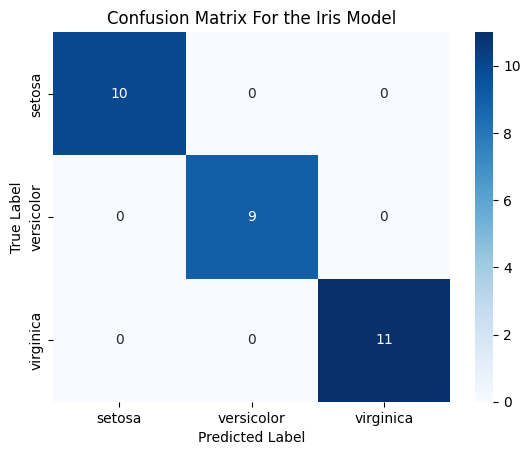

In [18]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

print("classification report:\n",classification_report(y_test,y_pred))

#confusion matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap="Blues",xticklabels=iris.target_names,yticklabels=iris.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix For the Iris Model")
plt.show()

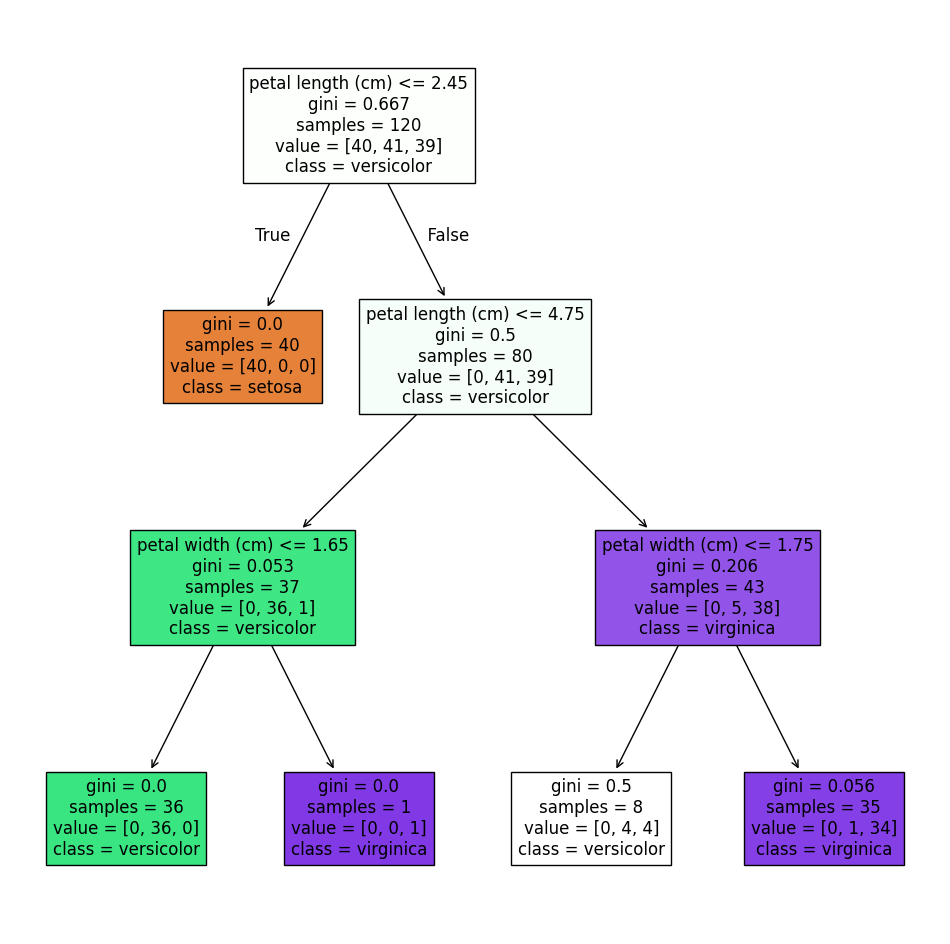

In [21]:
plt.figure(figsize=(12,12))
plot_tree(dt_model,feature_names=iris.feature_names,class_names=iris.target_names,filled=True)
plt.show()
